In [48]:
import  pandas as pd

In [49]:
Churn = pd.read_csv("Churn.csv",index_col=False)

In [50]:
Churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


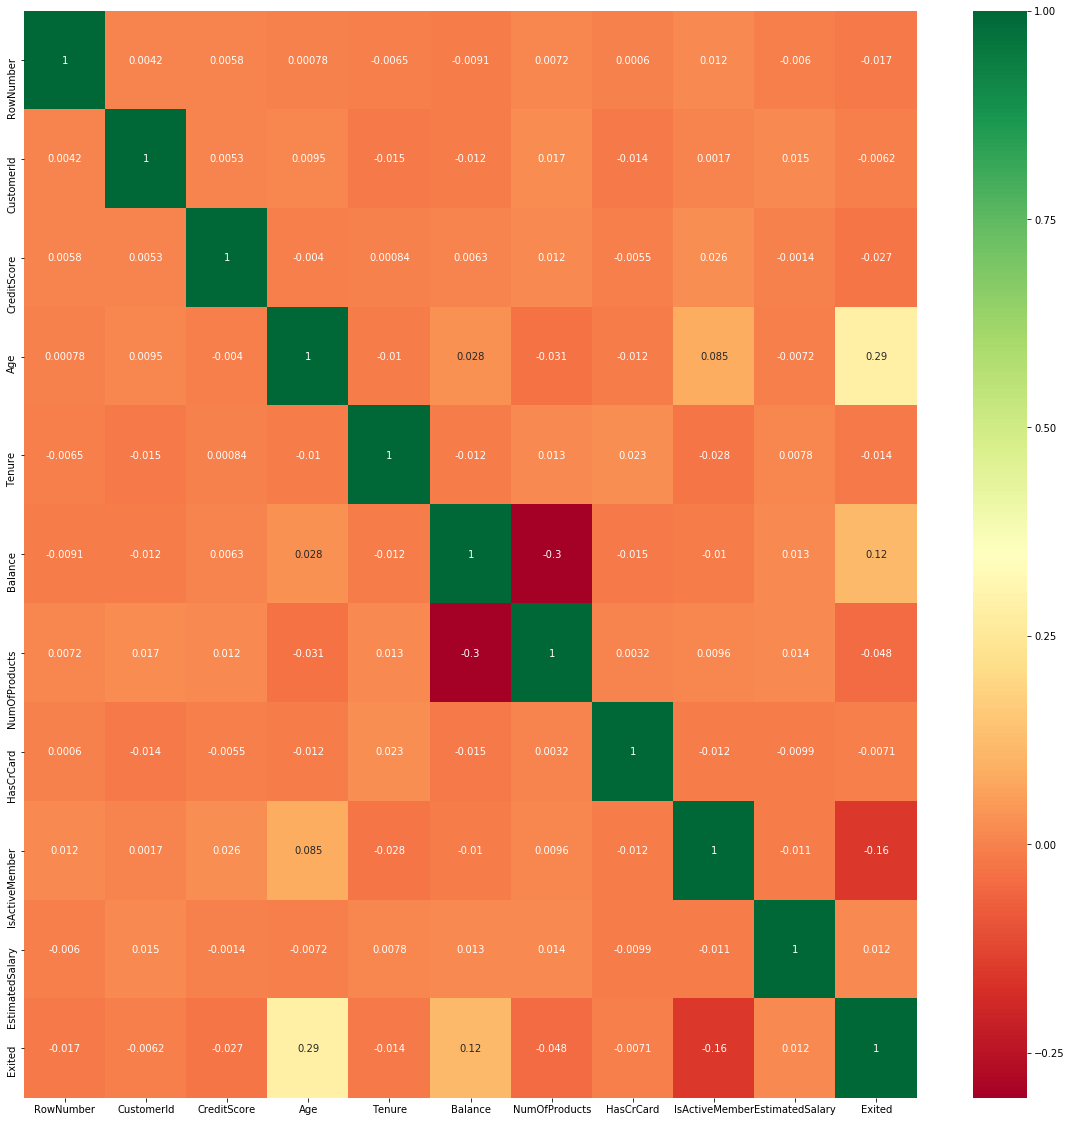

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
#### Correlation
corr_data = Churn.corr()
top_corr_features = corr_data.index
plt.figure(figsize = (20,20))
sns.heatmap(corr_data,annot=True,cmap="RdYlGn")

In [52]:
top_corr_features = corr_data.index
top_corr_features

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [70]:
X = Churn.iloc[:,3:13]
X.shape

(10000, 10)

In [71]:
Y = Churn.iloc[:,13]
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [72]:
geography = pd.get_dummies(X['Geography'],drop_first = True)
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [73]:
Gender = pd.get_dummies(X['Gender'],drop_first = True)
Gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [74]:
X = X.drop(['Gender','Geography'],axis = 1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [75]:
X = pd.concat([X,Gender,geography],axis = 1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [76]:
### Hyper parameters Optimization
params = {
    "learning_rate": [0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth": [3,4,5,6,8,10,12,15],
    "min_child_weight": [1,3,5,7],
    "gamma": [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7]
    
}

In [77]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import xgboost

In [78]:
classifier = xgboost.XGBClassifier()

In [79]:
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter = 5,scoring = 'roc_auc',n_jobs = -1,cv = 5,verbose = 3)
random_search.fit(X,Y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   17.6s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_co...
                                           validate_parameters=None,
                                           verbosity=None),
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distributions={'co

In [80]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 4,
 'learning_rate': 0.05,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [84]:
from numpy import nan
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier,X,Y,cv = 10)

In [86]:
score

array([0.86813187, 0.85914086, 0.87812188, 0.866     , 0.864     ,
       0.85      , 0.865     , 0.88088088, 0.85985986, 0.85385385])

In [87]:
score.mean()

0.8644989199989201

In [92]:
from datetime import datetime
def timer(start_time = None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now()- start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print("\n Time taken: %i hours %i minutes and %i seconds," %(thour,tmin,round(tsec,2)))

datetime.datetime(2020, 10, 2, 19, 29, 38, 175518)